<a href="https://colab.research.google.com/github/gulabpatel/ML_Algos_Python/blob/main/Light_GBM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lightgbm

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/golf.csv')

In [4]:
df.head(20)

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [5]:
df.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'Play Golf'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Outlook    14 non-null     object
 1   Temp       14 non-null     object
 2   Humidity   14 non-null     object
 3   Windy      14 non-null     bool  
 4   Play Golf  14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [7]:
import numpy as np
from sklearn import preprocessing

In [8]:
le = preprocessing.LabelEncoder()

In [9]:
for column in df.columns:
  if df[column].dtypes == 'object':
    le.fit(df[column])
    encoded_feature = le.transform(df[column])
    df[column] = pd.DataFrame(encoded_feature)

In [10]:
le.fit(df['Windy'])
encoded_feature = le.transform(df['Windy'])
df['Windy'] = pd.DataFrame(encoded_feature)

In [11]:
df.sample(10)

,Outlook,Temp,Humidity,Windy,Play Golf
11,0,2,0,1,1
9,2,2,1,0,1
7,1,2,0,0,0
12,0,1,1,0,1
13,2,2,0,1,0
3,2,2,0,0,1
8,1,0,1,0,1
5,2,0,1,1,0
10,1,2,1,1,1
1,1,1,0,1,0


In [12]:
X = df.drop(['Play Golf'], axis = 1)
y = df['Play Golf']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Outlook    14 non-null     int64
 1   Temp       14 non-null     int64
 2   Humidity   14 non-null     int64
 3   Windy      14 non-null     int64
 4   Play Golf  14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


In [14]:
import lightgbm as gbm

In [15]:
#convert X,y in gbm form
gbm_train = gbm.Dataset(X,y,feature_name = ['Outlook','Temp','Humidity','Windy']
,categorical_feature = ['Outlook','Windy'])

In [16]:
df['Play Golf'].unique()

array([0, 1])

In [17]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    #'objective': 'regression', #for regression
    #'metric':'rmse
       'num_class': len(df['Play Golf'].unique()),
       'min_data':1
}

In [18]:
gbm_model = gbm.train(params, gbm_train, num_boost_round=50)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [19]:
predictions = gbm_model.predict(X)

In [20]:
predictions

array([[0.99589453, 0.00410547],
       [0.99589453, 0.00410547],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.99589453, 0.00410547],
       [0.00235277, 0.99764723],
       [0.99589453, 0.00410547],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.99589453, 0.00410547]])

In [24]:
index = 0
for pred in predictions:
  if np.argmax(pred) == 0:
    p = "No"
  else:
    p = "Yes"
    #-----------------------------
  a = y[index]
  if a == 0:
    a = "No"
  else:
    a = "Yes"
    #------------------------------
  print("predictions is: ", p, "   Whereas actual is :", a)
  index +=1

predictions is:  No    Whereas actual is : No
predictions is:  No    Whereas actual is : No
predictions is:  Yes    Whereas actual is : Yes
predictions is:  Yes    Whereas actual is : Yes
predictions is:  Yes    Whereas actual is : Yes
predictions is:  No    Whereas actual is : No
predictions is:  Yes    Whereas actual is : Yes
predictions is:  No    Whereas actual is : No
predictions is:  Yes    Whereas actual is : Yes
predictions is:  Yes    Whereas actual is : Yes
predictions is:  Yes    Whereas actual is : Yes
predictions is:  Yes    Whereas actual is : Yes
predictions is:  Yes    Whereas actual is : Yes
predictions is:  No    Whereas actual is : No


##Interpretability

In [29]:
import matplotlib.pyplot as plt

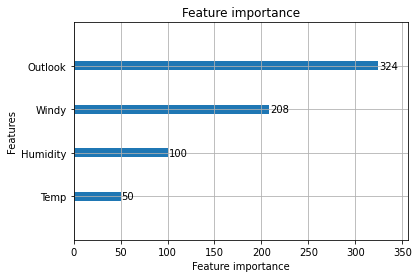

In [26]:
gbm.plot_importance(gbm_model, max_num_features=10)
#plt.show()

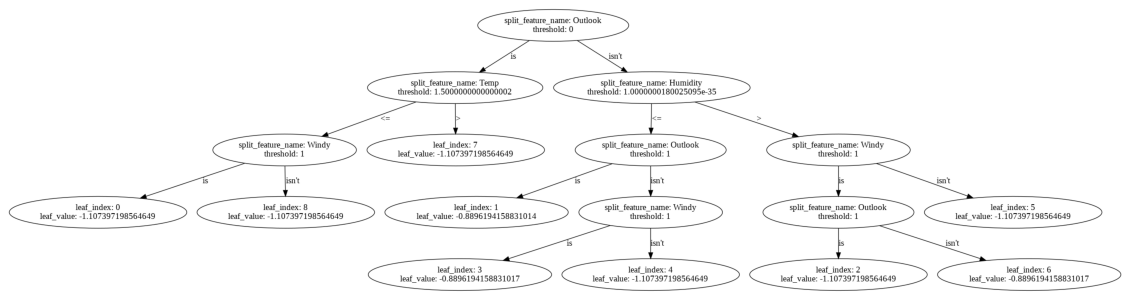

In [30]:
fig_size = [20,20]
plt.rcParams['figure.figsize'] = fig_size
gbm.plot_tree(gbm_model)